## Accessibility of Public Libraries in Washington

Public library accessibility plays a vital role in ensuring equitable access to information and resources for all residents. Despite a growing number of public libraries in Washington over the past decade, disparities in their spatial distribution persist. Some communities enjoy convenient access to nearby libraries, while others face significant geographic and social barriers. This project explores the current state of spatial accessibility to public libraries across Washington, highlighting gaps in service and identifying opportunities to improve equitable access for all populations.
# Goals To Study
1- How Libraries are Distributed in Washington?  
2- Is there a Regional Gap in Libraries Accessibility?  
3- Which areas are underserved or overserved?  


# Load And Clean Datasets

In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load and inspect library locations
libraries = pd.read_csv("Library_Locations.csv")
print("Library Data Columns:\n", libraries.columns)
print("\nSample Data:\n", libraries.head())                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# Convert to GeoDataFrame
libraries_gdf = gpd.GeoDataFrame(libraries, geometry=gpd.points_from_xy(libraries['X'], libraries['Y']), crs="EPSG:4326")




Library Data Columns:
 Index(['X', 'Y', 'OBJECTID', 'LDTC_TypeDescription', 'LDLI_Category',
       'Library', 'Branch', 'SecondaryName', 'LDLI_Address1', 'LDLI_City',
       'LDLI_State', 'LDLI_Zip', 'LDLI_County', 'LDLI_AddPhones', 'LDLI_FAX',
       'LDLI_email', 'LDLI_URL', 'Longitude', 'Latitude', 'GlobalID'],
      dtype='object')

Sample Data:
             X          Y  OBJECTID LDTC_TypeDescription LDLI_Category  \
0 -122.466490  47.187870         1   Academic Libraries        2-year   
1 -122.301434  47.388627         2   Academic Libraries        2-year   
2 -122.312880  48.438380         3   Academic Libraries        2-year   
3 -122.635130  48.289090         4   Academic Libraries        2-year   
4 -122.929520  47.023720         5   Academic Libraries        2-year   

                                           Library  \
0  Bates Technical College Library Downtown Campus   
1                         Highline College Library   
2      Skagit Valley College, Norwood Cole Li

# Clean & Plot Library Dataset


Sample Data:
             X          Y                                          Library  \
0 -122.466490  47.187870  Bates Technical College Library Downtown Campus   
1 -122.301434  47.388627                         Highline College Library   
2 -122.312880  48.438380      Skagit Valley College, Norwood Cole Library   
3 -122.635130  48.289090      Skagit Valley College, Norwood Cole Library   
4 -122.929520  47.023720      South Puget Sound Community College Library   

      LDLI_City LDLI_County  
0        Tacoma      Pierce  
1    Des Moines        King  
2  Mount Vernon      Skagit  
3    Oak Harbor      Island  
4       Olympia    Thurston  


D:\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


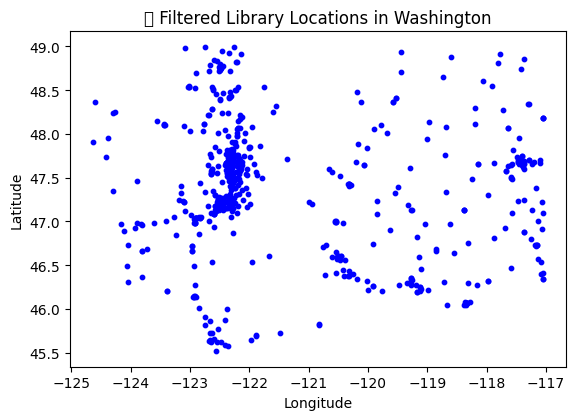

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load library data
libraries = pd.read_csv("Library_Locations.csv")

# Filter the columns
libraries_filtered = libraries[['X', 'Y', 'Library', 'LDLI_City', 'LDLI_County']]
print("\nSample Data:\n", libraries_filtered.head())   
# Convert to GeoDataFrame using X and Y for geometry
libraries_gdf = gpd.GeoDataFrame(
    libraries_filtered,
    geometry=gpd.points_from_xy(libraries_filtered['X'], libraries_filtered['Y']),
    crs="EPSG:4326"
)

# Plot the libraries
libraries_gdf.plot(color='blue', markersize=10)
plt.title("📚 Filtered Library Locations in Washington")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Census Track Dataset Ploting

Census Tract Columns:
 Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

Sample Data:
   STATEFP COUNTYFP TRACTCE        GEOID    NAME             NAMELSAD  MTFCC  \
0      53      061  051100  53061051100     511     Census Tract 511  G5020   
1      53      061  051200  53061051200     512     Census Tract 512  G5020   
2      53      073  010406  53073010406  104.06  Census Tract 104.06  G5020   
3      53      073  000807  53073000807    8.07    Census Tract 8.07  G5020   
4      53      073  010504  53073010504  105.04  Census Tract 105.04  G5020   

  FUNCSTAT     ALAND    AWATER     INTPTLAT      INTPTLON  \
0        S   2057724         0  +47.7839887  -122.3071171   
1        S   2100804         0  +47.7978114  -122.3058150   
2        S   7063026   4921207  +48.9553936  -122.7569778   
3        S  84381937  10748590  +48.6921866  -122.2652813   
4     

D:\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


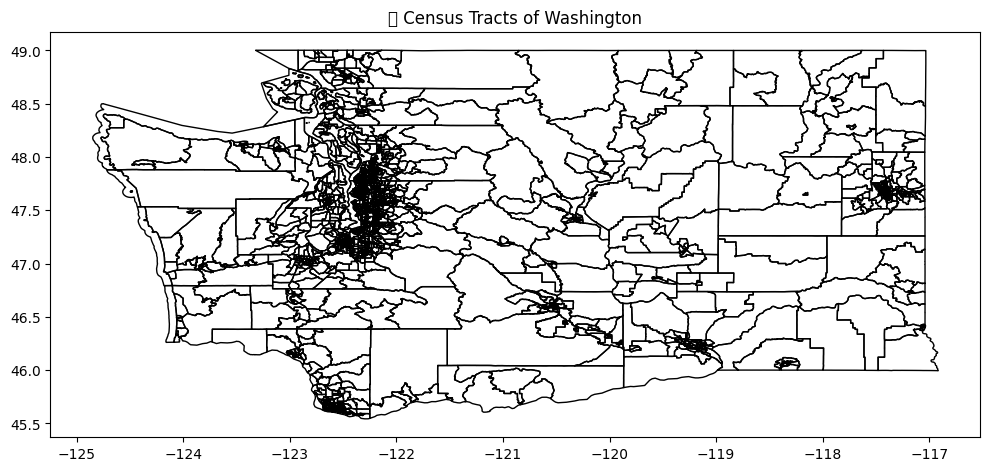

In [3]:
  # Make sure this is imported

# Load and inspect census tracts
tracts = gpd.read_file("tl_2022_53_tract.shp")
print("Census Tract Columns:\n", tracts.columns)
print("\nSample Data:\n", tracts.head())

# Plot the census tracts with increased figure size
fig, ax = plt.subplots(figsize=(12, 12))  # You can adjust width and height here
tracts.plot(edgecolor='black', facecolor='none', ax=ax)
ax.set_title("🗺️ Census Tracts of Washington")
plt.show()


# Combined Spatial Distribution of Census Tracts and Public Libraries
Plotting the combined view of Census Track and Public Libraries after setting then to the same crs.

C:\Users\Admin\AppData\Local\Temp\ipykernel_10768\2704790492.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


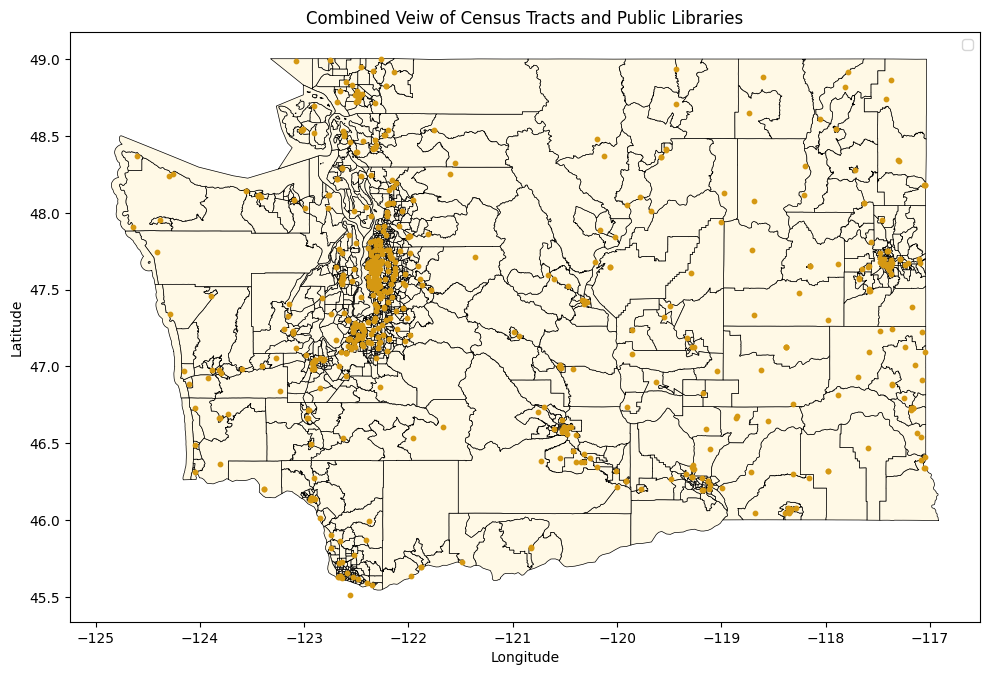

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load census tracts shapefile
tracts = gpd.read_file("tl_2022_53_tract.shp")

# Ensure CRS is set
if tracts.crs is None:
    tracts.set_crs("EPSG:4269", inplace=True)

# Load and filter library data
libraries = pd.read_csv("Library_Locations.csv")
libraries_filtered = libraries[['X', 'Y', 'Library', 'LDLI_City', 'LDLI_County']]

# Convert to GeoDataFrame
libraries_gdf = gpd.GeoDataFrame(
    libraries_filtered,
    geometry=gpd.points_from_xy(libraries_filtered['X'], libraries_filtered['Y']),
    crs="EPSG:4326"
)

# Reproject to match tracts
libraries_gdf = libraries_gdf.to_crs(tracts.crs)

# Plot with custom fill color
fig, ax = plt.subplots(figsize=(10, 10))
tracts.plot(ax=ax, edgecolor='black', facecolor='#fff9e6', linewidth=0.5)  # pale blue
libraries_gdf.plot(ax=ax, color='#d59812', markersize=10)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Combined Veiw of Census Tracts and Public Libraries")
plt.legend()
plt.tight_layout()
plt.show()


# Mapping Public Libraries to Base map

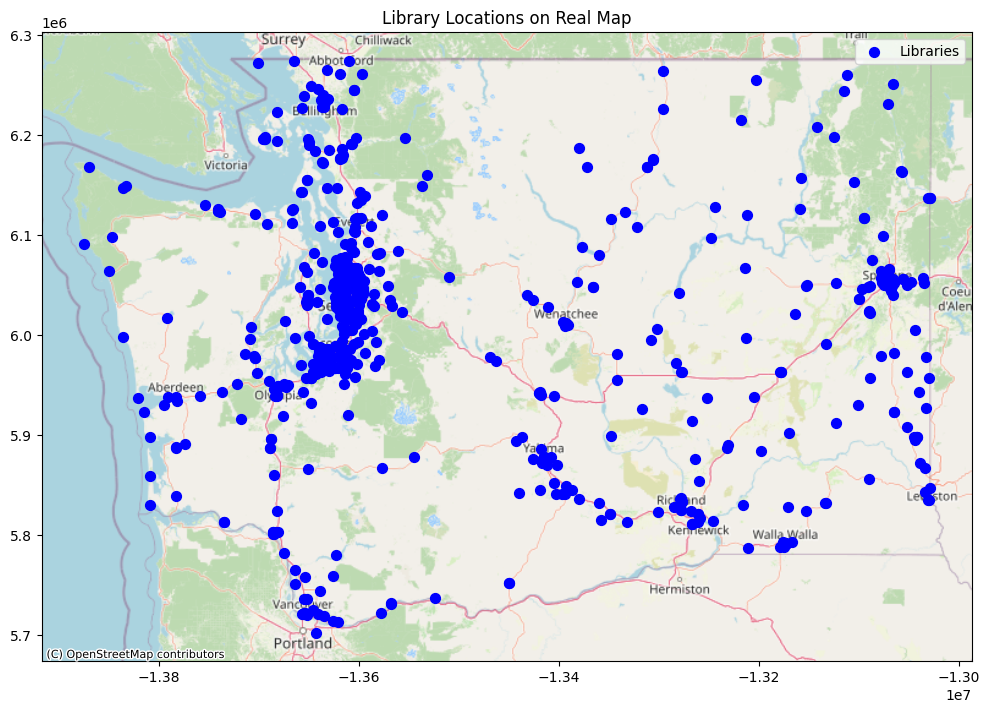

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# Load data
libraries = pd.read_csv("Library_Locations.csv")
roads = gpd.read_file("tl_2022_53_tract.shp")
#pop_density = pd.read_excel("popden_city.xlsx")

# Convert libraries to GeoDataFrame
libraries_gdf = gpd.GeoDataFrame(
    libraries,
    geometry=gpd.points_from_xy(libraries.X, libraries.Y),
    crs="EPSG:4326"  # Assuming X = longitude, Y = latitude
)

# Reproject to Web Mercator for contextily
libraries_gdf = libraries_gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
libraries_gdf.plot(ax=ax, color='blue', markersize=50, label='Libraries')
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Library Locations on Real Map")
#ax.axis('off')
plt.legend()
plt.show()


# Ploting Census Track By Area

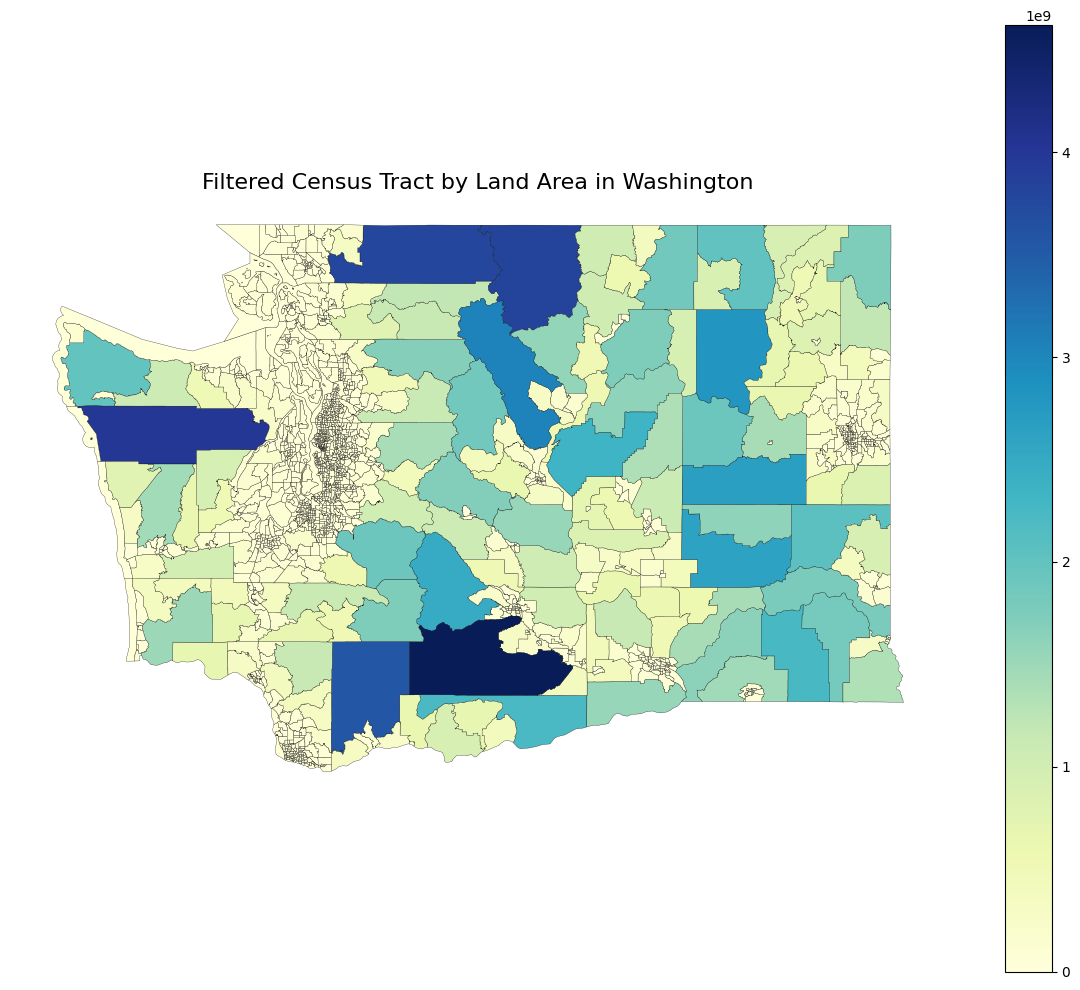

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
tracts = gpd.read_file("tl_2022_53_tract.shp")

# Filter to only GEOID, ALAND, and geometry
filtered_tracts = tracts[['GEOID', 'ALAND', 'geometry']].copy()

# Convert CRS if you want a basemap later
filtered_tracts = filtered_tracts.set_crs(epsg=4269).to_crs(epsg=3857)

# Plot ALAND (land area) in choropleth
fig, ax = plt.subplots(figsize=(12, 10))
filtered_tracts.plot(
    column='ALAND',
    cmap='YlGnBu',
    legend=True,
    edgecolor='black',
    linewidth=0.2,
    ax=ax
)

# Optional: Add basemap
# import contextily as ctx
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Filtered Census Tract by Land Area in Washington", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


# Statistics of Population in Washington

In [7]:
import pandas as pd

# Example of loading the CSV
pop_density = pd.read_csv("pop_density.csv")

# === STEP 1: Clean GEOID in population dataframe ===
pop_density['GEOID'] = pop_density['GEO_ID'].str.replace('1400000US', '', regex=False)
pop_density = pop_density[pop_density['GEOID'].str.len() == 11]

# === STEP 2: Merge shapefile (GeoDataFrame) with population data on GEOID ===
# Assuming your shapefile GeoDataFrame is `gdf`
merged_gdf = tracts.merge(pop_density, on='GEOID', how='left')

# === STEP 3: Convert relevant columns ===
merged_gdf['ALAND'] = pd.to_numeric(merged_gdf['ALAND'], errors='coerce')
merged_gdf['B01003_001E'] = pd.to_numeric(merged_gdf['B01003_001E'], errors='coerce')

# Drop rows with missing data
merged_gdf = merged_gdf.dropna(subset=['ALAND', 'B01003_001E'])
merged_gdf = merged_gdf[merged_gdf['ALAND'] > 0]

# === STEP 4: Calculate population density ===
merged_gdf['area_km2'] = merged_gdf['ALAND'] / 1e6
merged_gdf['pop_density'] = merged_gdf['B01003_001E'] / merged_gdf['area_km2']

# === DEBUG PRINT: Summary of pop_density ===
print(merged_gdf['pop_density'].describe())



count     1772.000000
mean      1642.534059
std       2648.518165
min          0.000000
25%        217.117481
50%       1132.377811
75%       2101.752808
max      46939.613857
Name: pop_density, dtype: float64


# Population Density by Census Tract in Washington

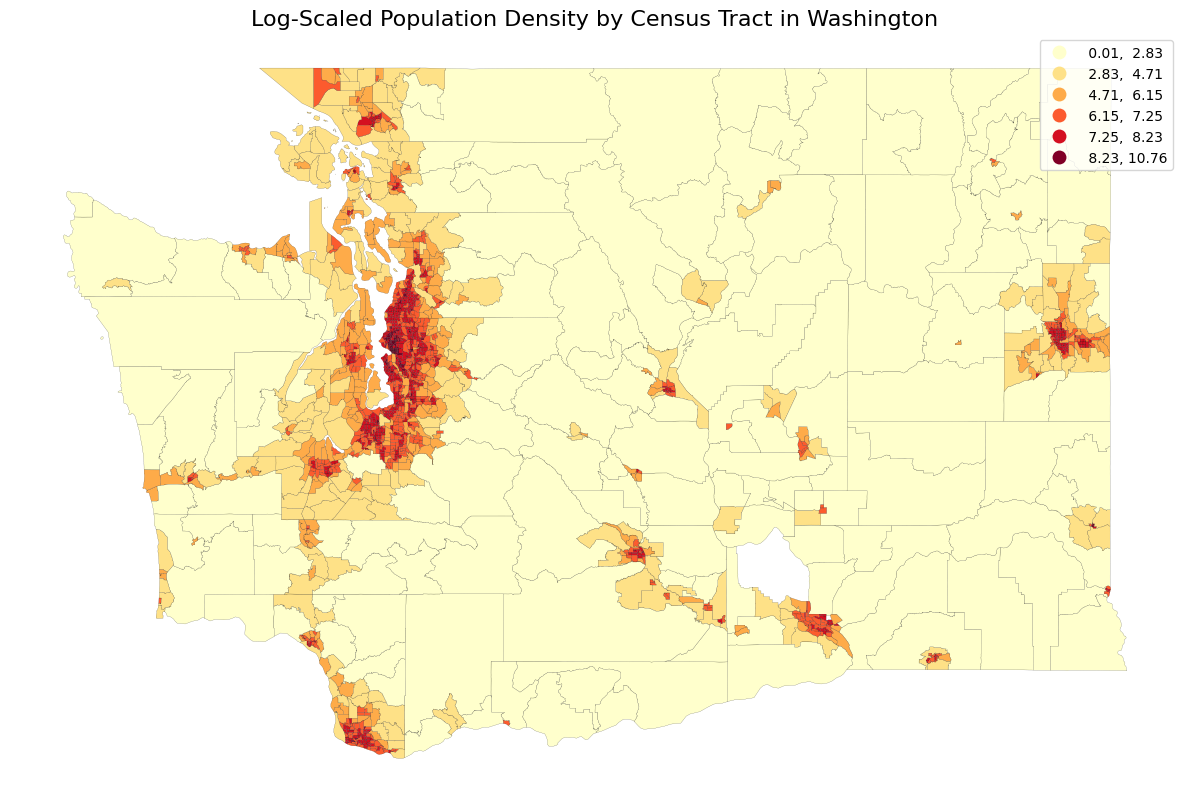

In [8]:
# Check and assign original CRS if missing
if merged_gdf.crs is None:
    merged_gdf.set_crs(epsg=4269, inplace=True)  # or try 4326 if 4269 doesn't look right

# Now apply your filtering and transformation
filtered_gdf = merged_gdf[merged_gdf['pop_density'] > 0].copy()
filtered_gdf['log_pop_density'] = np.log1p(filtered_gdf['pop_density'])

# Reproject to Web Mercator for basemaps
filtered_gdf = filtered_gdf.to_crs(epsg=3857)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 10))
filtered_gdf.plot(
    column='log_pop_density',
    cmap='YlOrRd',
    legend=True,
    scheme='natural_breaks',
    k=6,
    ax=ax,
    edgecolor='black',
    linewidth=0.1
)

# Optional: add basemap
# import contextily as ctx
# ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Log-Scaled Population Density by Census Tract in Washington", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


# Plot Libraries over Log-Scaled Population Density

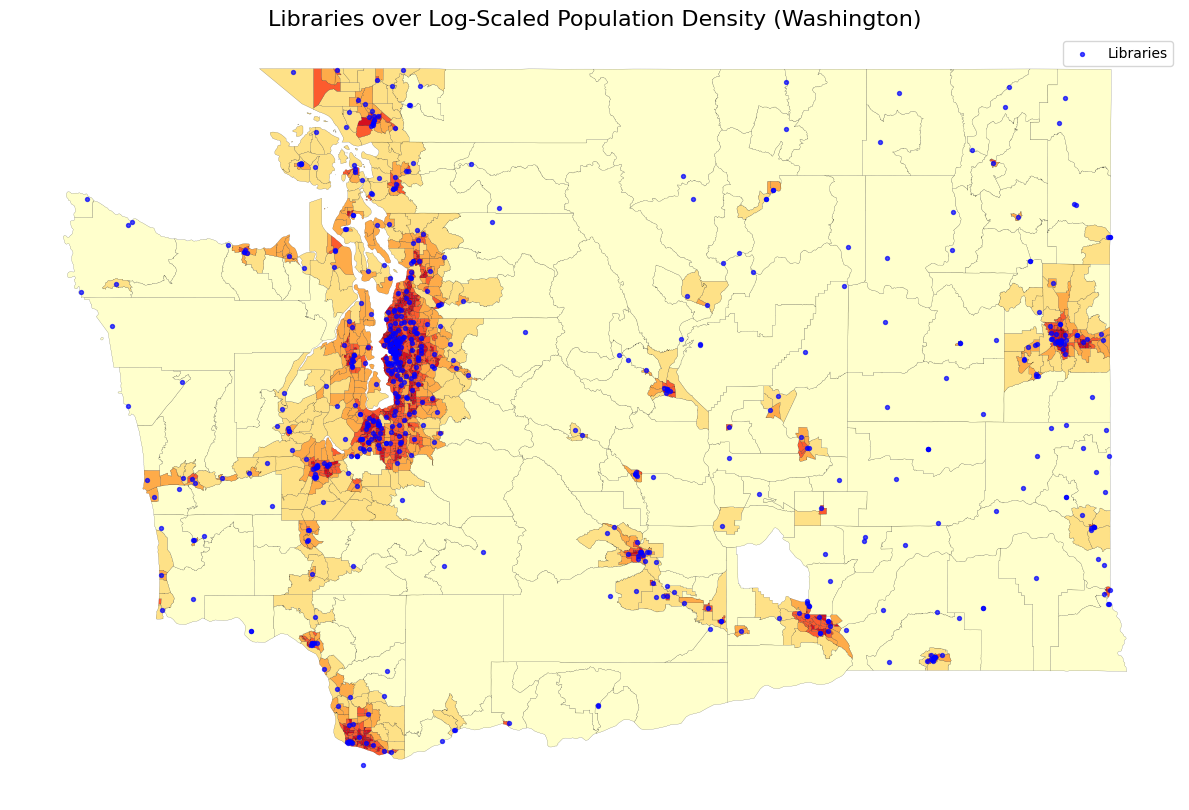

In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load library CSV (assuming columns are 'longitude' and 'latitude')
libraries_df = pd.read_csv("Library_Locations.csv")

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(libraries_df['X'], libraries_df['Y'])]
libraries_gdf = gpd.GeoDataFrame(libraries_df, geometry=geometry)

# Set CRS as WGS84 (lat/lon)
libraries_gdf.set_crs(epsg=4326, inplace=True)

# Reproject to match population map
libraries_gdf = libraries_gdf.to_crs(epsg=3857)

# Replot with libraries
fig, ax = plt.subplots(figsize=(12, 10))

# Plot population density
filtered_gdf.plot(
    column='log_pop_density',
    cmap='YlOrRd',
    legend=True,
    scheme='natural_breaks',
    k=6,
    ax=ax,
    edgecolor='black',
    linewidth=0.1
)

# Plot library locations as points
libraries_gdf.plot(ax=ax, color='blue', markersize=8, label='Libraries', alpha=0.7)


# Add legend/title
ax.set_title("Libraries over Log-Scaled Population Density (Washington)", fontsize=16)
ax.legend()
ax.axis('off')
plt.tight_layout()
plt.show()


# Import Code Libraries 

In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from libpysal.weights import Queen
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, lisa_cluster
import seaborn as sns
from libpysal.weights import lag_spatial


# Load Datasets & Set crs

In [11]:
# === STEP 1: Load datasets ===
print("Loading data...")
libraries = pd.read_csv("Library_Locations.csv")
population = pd.read_csv("pop_density.csv")
tracts = gpd.read_file("tl_2022_53_tract.shp")

# Set CRS for tracts if missing
if tracts.crs is None:
    tracts = tracts.set_crs("EPSG:4269")  # NAD83 for US Census data
print(f"Tracts CRS: {tracts.crs}")

Loading data...
Tracts CRS: EPSG:4269


# Cleaning & Filteration of All Datasets 

In [12]:
# === STEP 2: Clean library data ===
print("Cleaning library data...")
libraries["Longitude"] = pd.to_numeric(libraries["Longitude"], errors="coerce")
libraries["Latitude"] = pd.to_numeric(libraries["Latitude"], errors="coerce")
libraries.dropna(subset=["Longitude", "Latitude"], inplace=True)
libraries = gpd.GeoDataFrame(
    libraries,
    geometry=gpd.points_from_xy(libraries["Longitude"], libraries["Latitude"]),
    crs="EPSG:4326"  # WGS84
)

# === STEP 3: Clean and prepare population data ===
print("Cleaning population data...")
population = population[population["GEO_ID"].str.startswith("1400000US")]
population["GEOID"] = population["GEO_ID"].str[-11:]
population["B01003_001E"] = pd.to_numeric(population["B01003_001E"], errors="coerce")

Cleaning library data...
Cleaning population data...


# Merging Datasets (Tracks & Population)

In [13]:
# === STEP 4: Merge tracts with population ===
print("Merging tracts with population...")
tracts["GEOID"] = tracts["GEOID"].astype(str)
tracts = tracts.merge(population[["GEOID", "B01003_001E"]], on="GEOID", how="left")
tracts.rename(columns={"B01003_001E": "population"}, inplace=True)

# === STEP 5: Drop missing values and calculate area ===
tracts = tracts.dropna(subset=["population"])
tracts["ALAND"] = pd.to_numeric(tracts["ALAND"], errors="coerce")
tracts = tracts[tracts["ALAND"] > 0]
tracts["area_km2"] = tracts["ALAND"] / 1e6
tracts["pop_density"] = tracts["population"] / tracts["area_km2"]

# Remove tracts with zero population to prevent division by zero
tracts = tracts[tracts["population"] > 0]

Merging tracts with population...


# Computing Centroids of Tracks

In [14]:
# === STEP 6: Compute centroids ===
tracts["centroid"] = tracts.geometry.centroid
centroids = gpd.GeoDataFrame(geometry=tracts["centroid"], crs=tracts.crs)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10768\2289775155.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts["centroid"] = tracts.geometry.centroid


# Projecting Datasets To Same crs

In [15]:
# === STEP 7: Reproject everything to EPSG:3857 ===
print("Reprojecting to EPSG:3857...")
tracts = tracts.to_crs(epsg=3857)
libraries = libraries.to_crs(epsg=3857)
centroids = centroids.to_crs(epsg=3857)
tracts["centroid"] = centroids.geometry

Reprojecting to EPSG:3857...


# Calculate Euclidean distance to nearest library

In [16]:
# === STEP 8: Calculate Euclidean distance to nearest library ===
print("Computing distances to nearest library...")
library_points = libraries.geometry
tracts["min_library_dist"] = tracts["centroid"].apply(
    lambda pt: library_points.distance(pt).min()
)


Computing distances to nearest library...


## Computing Spatial weights & Moran's I Based on Eucledian Distance

Computing spatial statistics...


C:\Users\Admin\AppData\Local\Temp\ipykernel_10768\3170797141.py:8: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(tracts_clean)
D:\miniconda3\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


Global Moran's I: 0.5965, p-value: 0.0010


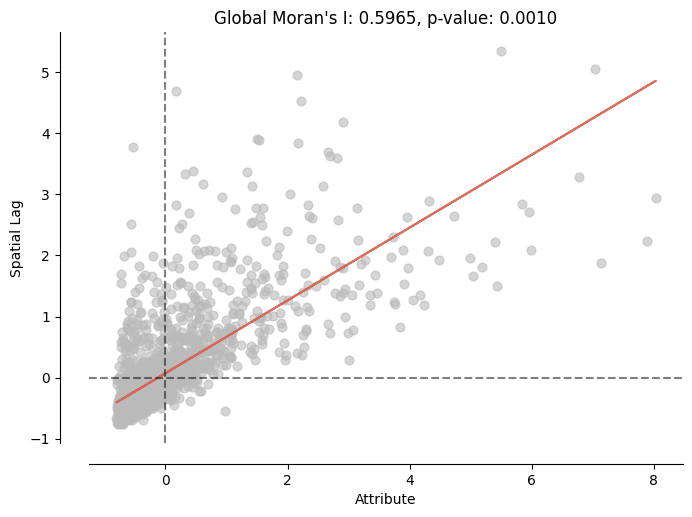

In [17]:

# === STEP 9: Spatial Weights and Moran's I ===
print("Computing spatial statistics...")
tracts_clean = tracts.dropna(subset=["min_library_dist", "pop_density"]).copy()

# Reset index to ensure consecutive integer indexing
tracts_clean = tracts_clean.reset_index(drop=True)

w = Queen.from_dataframe(tracts_clean)
w.transform = "r"

moran_access = Moran(tracts_clean["min_library_dist"], w)
print(f"Global Moran's I: {moran_access.I:.4f}, p-value: {moran_access.p_sim:.4f}")

fig, ax = moran_scatterplot(moran_access)
ax.set_title("Global Moran's I: 0.5965, p-value: 0.0010")
plt.tight_layout()
plt.show()

## LISA Cluster Map: Distance to Nearest Library

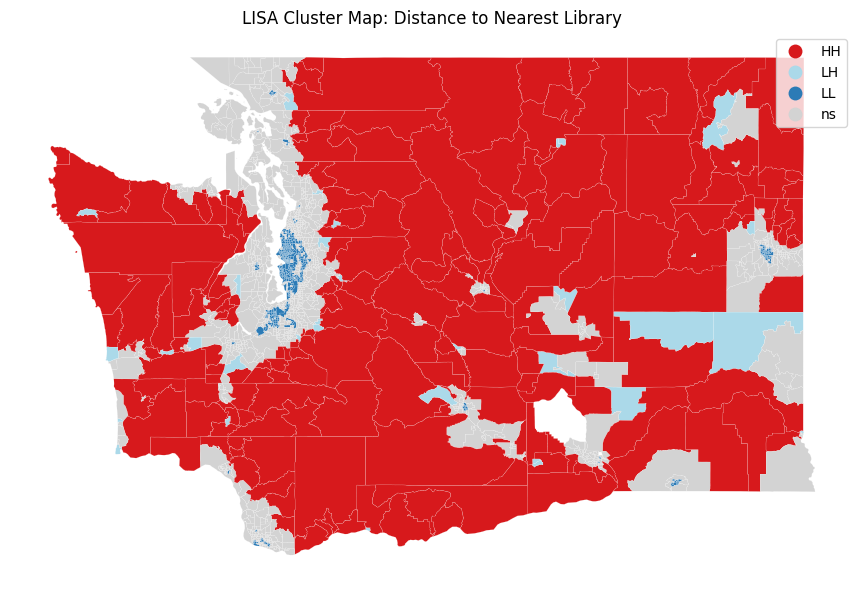

In [18]:
moran_local = Moran_Local(tracts_clean["min_library_dist"], w)
tracts_clean["lisa_cluster"] = moran_local.q
tracts_clean["lisa_p"] = moran_local.p_sim

fig, ax = plt.subplots(figsize=(10, 6))
lisa_cluster(moran_local, tracts_clean, p=0.05, ax=ax)
ax.set_title("LISA Cluster Map: Distance to Nearest Library")
plt.axis("off")
plt.tight_layout()
plt.show()

## Calculating accessibility score Ai

In [19]:
# === STEP 10: Calculate Accessibility Score Ai (FIXED) ===
print("Calculating accessibility score Ai...")
neighbor_pops = []

# Get valid indices from weights matrix
valid_indices = set(w.neighbors.keys())

for i in range(len(tracts_clean)):
    # Skip if index not in weights matrix
    if i not in valid_indices:
        neighbor_pops.append(np.nan)
        continue
        
    neighbors = w.neighbors[i]
    
    # Handle isolated tracts with no neighbors
    if not neighbors:
        neighbor_pops.append(np.nan)
        continue
        
    # Calculate accessibility score safely
    pop_sum = sum(tracts_clean.iloc[n]["population"] for n in neighbors)
    min_dist = tracts_clean.iloc[i]["min_library_dist"]
    tract_pop = tracts_clean.iloc[i]["population"]
    
    Ai = (pop_sum * min_dist) / tract_pop
    neighbor_pops.append(Ai)

tracts_clean["accessibility_score"] = neighbor_pops


Calculating accessibility score Ai...


# Distance to Nearest Library


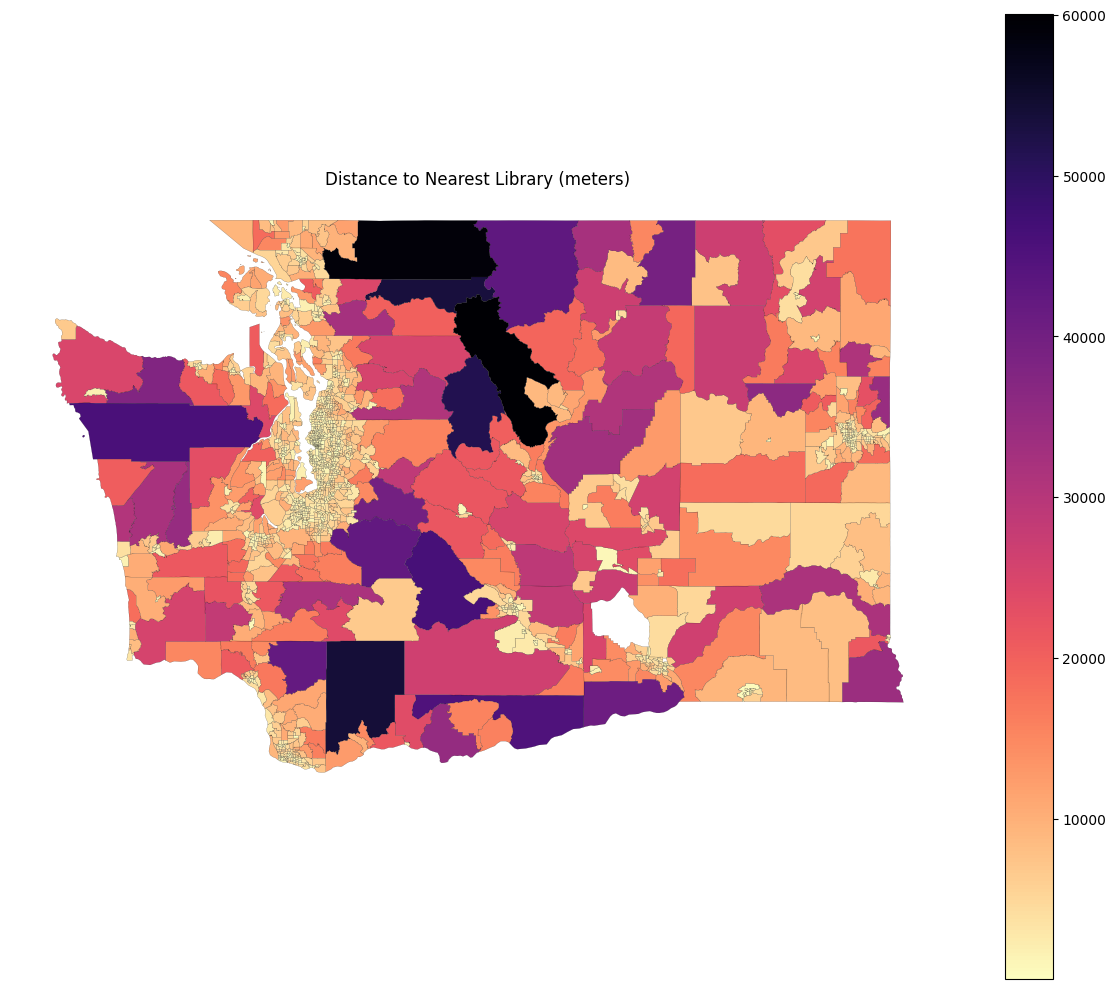

In [20]:
# Distance to Nearest Library
fig, ax = plt.subplots(figsize=(12, 10))
tracts_clean.plot(
    column="min_library_dist",
    cmap="magma_r",
    legend=True,
    ax=ax,
    edgecolor='black',
    linewidth=0.1
)
ax.set_title("Distance to Nearest Library (meters)")
plt.axis("off")
plt.tight_layout()
plt.show()

# Accessibility Score (Ai) by Quantile Class

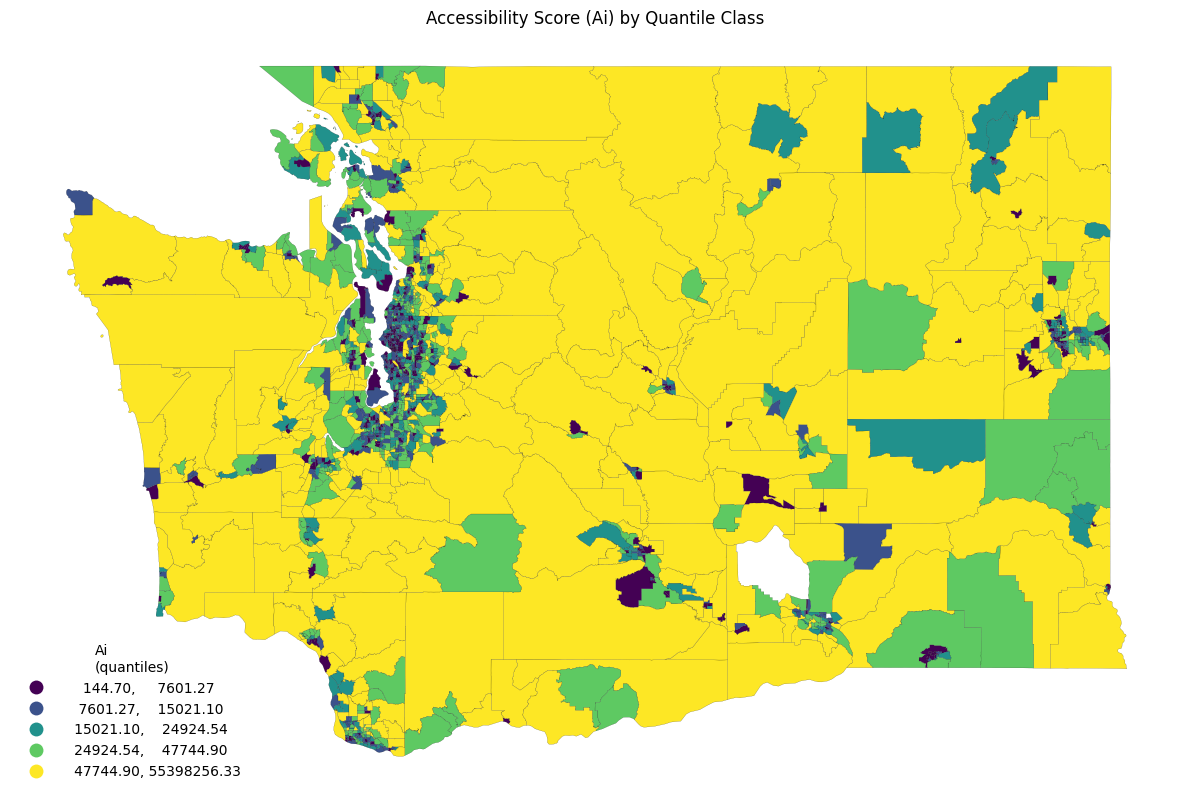

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
tracts_clean.plot(
    column="accessibility_score",
    scheme="quantiles",      # “quantiles”, “equal_interval”, “natural_breaks”, “std_mean”, …
    k=5,                     # number of classes
    cmap="viridis",
    legend=True,
    legend_kwds={
        "title": "Ai\n(quantiles)",
        "loc": "lower left",
        "frameon": False
    },
    ax=ax,
    edgecolor="black",
    linewidth=0.1
)
ax.set_title("Accessibility Score (Ai) by Quantile Class")
ax.set_axis_off()
ax.set_aspect("equal")
plt.tight_layout()
plt.show()



# Plotting top 20 and bottom 20 tracts by accessibility score

C:\Users\Admin\AppData\Local\Temp\ipykernel_10768\2258356518.py:40: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(frameon=True, loc='lower left')
C:\Users\Admin\AppData\Local\Temp\ipykernel_10768\2258356518.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=True, loc='lower left')


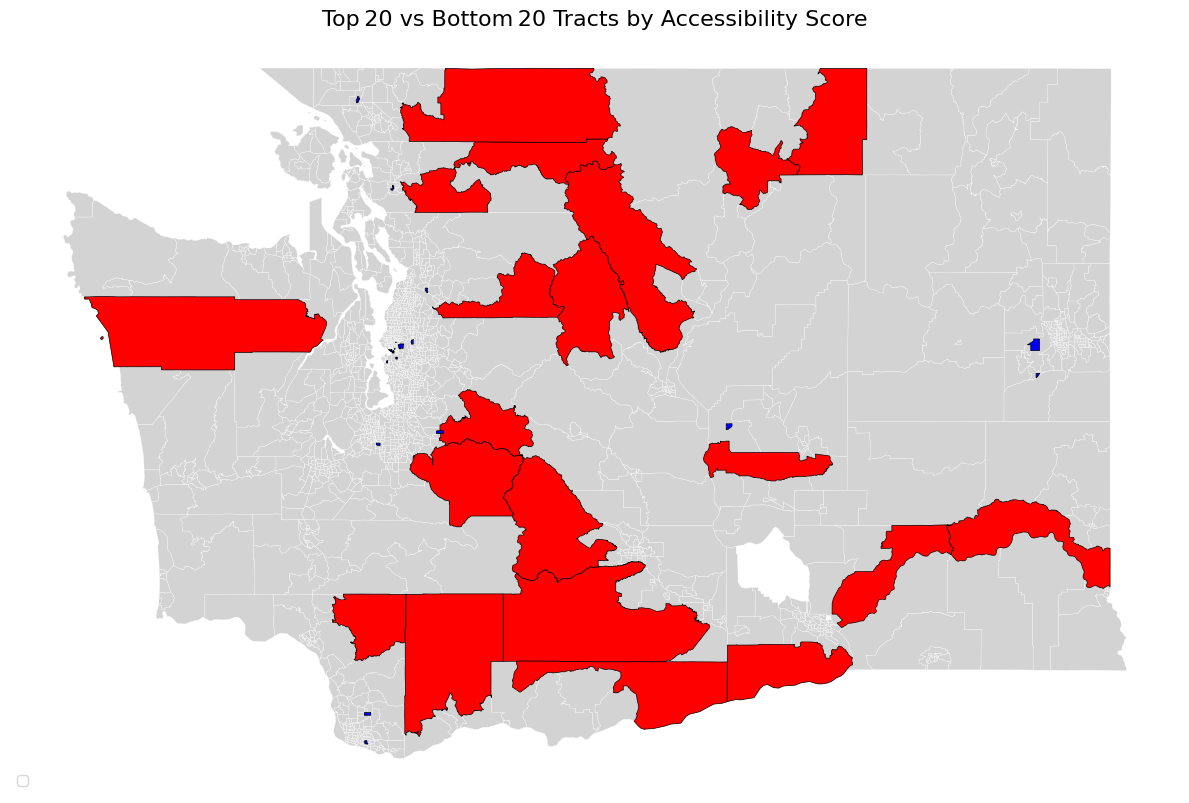

In [22]:

# === Extract top 20 and bottom 20 tracts by accessibility score ===
tracts_sorted = tracts_clean.sort_values("accessibility_score", ascending=True)
bottom20 = tracts_sorted.head(20)
top20 = tracts_sorted.tail(20)


# === Single‐map plot of Top 20 and Bottom 20 tracts ===
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# 1. light‐grey basemap of all tracts
tracts_clean.plot(
    ax=ax,
    color='lightgrey',
    edgecolor='white',
    linewidth=0.2
)

# 2. bottom‐20 in blue
bottom20.plot(
    ax=ax,
    color='blue',
    edgecolor='black',
    linewidth=0.5,
    label='Bottom 20 (low Ai)'
)

# 3. top‐20 in red
top20.plot(
    ax=ax,
    color='red',
    edgecolor='black',
    linewidth=0.5,
    label='Top 20 (high Ai)'
)

# 4. finalize
ax.set_title("Top 20 vs Bottom 20 Tracts by Accessibility Score", fontsize=16)
ax.axis('off')
ax.set_aspect('equal')
ax.legend(frameon=True, loc='lower left')

plt.tight_layout()
plt.show()



# Summary Statistics 

In [23]:
# === Final Summary ===
print("\nSummary Statistics:")
print(tracts_clean[["min_library_dist", "population", "pop_density", "accessibility_score"]].describe())


Summary Statistics:
       min_library_dist    population   pop_density  accessibility_score
count       1770.000000   1770.000000   1770.000000         1.770000e+03
mean        5494.848627   4373.437288   1644.390030         7.249747e+04
std         6796.342051   1511.873325   2649.438704         1.318480e+06
min           32.305818     42.000000      0.011762         1.446953e+02
25%         1672.463758   3323.250000    218.508933         9.101964e+03
50%         3269.833225   4257.500000   1135.679221         1.933484e+04
75%         6418.613657   5385.500000   2103.027119         4.008991e+04
max        60064.360153  10176.000000  46939.613857         5.539826e+07


## Moran's I for Log-Scaled Accessibility Score (log_Ai)
 
To standardize the range and distribution of values, the accessibility scores were log-transformed. This transformation helps smooth out extreme variations and provides more reliable results when calculating spatial autocorrelation using Moran's I.

Computing Moran's I for log-transformed Accessibility Score (log_Ai)...
Moran's I (log_Ai): 0.4167, p-value: 0.0010


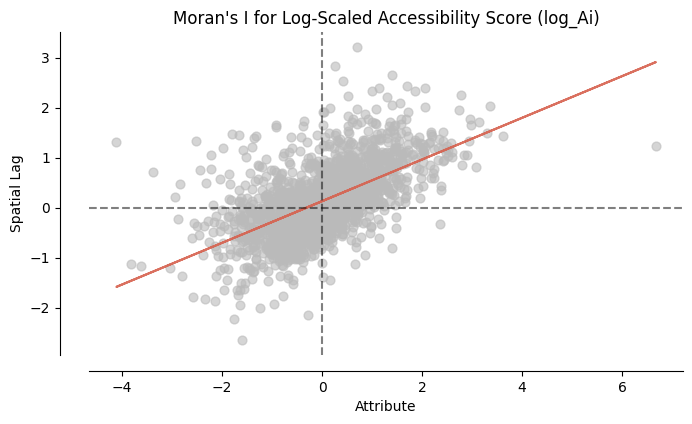

In [24]:
# === STEP: Log-transform Ai ===
tracts_clean["log_Ai"] = np.log1p(tracts_clean["accessibility_score"])  # log(1 + x) handles zeros safely

# === STEP: Moran's I on log-transformed Ai ===
print("Computing Moran's I for log-transformed Accessibility Score (log_Ai)...")
moran_log_ai = Moran(tracts_clean["log_Ai"].fillna(0), w)

print(f"Moran's I (log_Ai): {moran_log_ai.I:.4f}, p-value: {moran_log_ai.p_sim:.4f}")

fig, ax = moran_scatterplot(moran_log_ai)
ax.set_title("Moran's I for Log-Scaled Accessibility Score (log_Ai)")
plt.tight_layout()
plt.show()

## Scatter Plot of Scatterplot of Log Ai vs. Spatial Lag

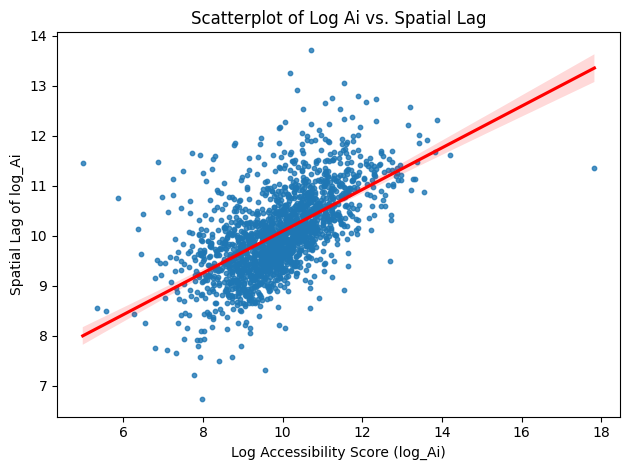

In [25]:
# === STEP: Spatial lag of log_Ai ===
tracts_clean["log_Ai_lag"] = lag_spatial(w, tracts_clean["log_Ai"].fillna(0))

# Optional scatterplot of Ai vs lag
sns.regplot(
    x=tracts_clean["log_Ai"],
    y=tracts_clean["log_Ai_lag"],
    line_kws={'color': 'red'},
    scatter_kws={'s': 10}
)
plt.xlabel("Log Accessibility Score (log_Ai)")
plt.ylabel("Spatial Lag of log_Ai")
plt.title("Scatterplot of Log Ai vs. Spatial Lag")
plt.tight_layout()
plt.show()


## LISA Cluster Map: Log Accessibility Score (log_Ai)

Computing Local Moran's I (LISA) for log_Ai...


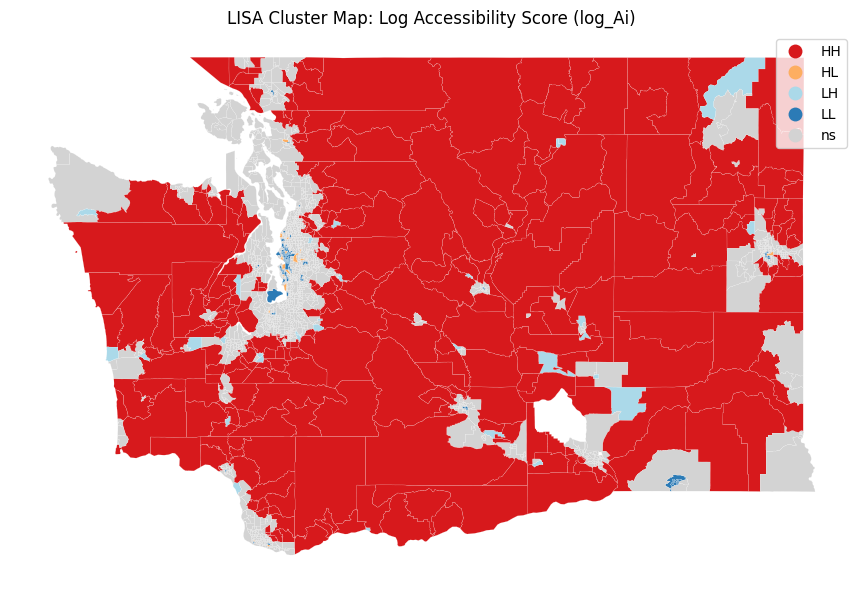

In [26]:
# === STEP: Local Moran's I (LISA) on log_Ai ===
print("Computing Local Moran's I (LISA) for log_Ai...")
moran_local_log_ai = Moran_Local(tracts_clean["log_Ai"].fillna(0), w)

tracts_clean["lisa_log_ai_cluster"] = moran_local_log_ai.q
tracts_clean["lisa_log_ai_p"] = moran_local_log_ai.p_sim

# LISA cluster map
fig, ax = plt.subplots(figsize=(10, 6))
lisa_cluster(moran_local_log_ai, tracts_clean, p=0.05, ax=ax)
ax.set_title("LISA Cluster Map: Log Accessibility Score (log_Ai)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [27]:
# === Final Summary ===
print("\nSummary Statistics:")
print(tracts_clean[["min_library_dist", "population", "pop_density", "accessibility_score"]].describe())


Summary Statistics:
       min_library_dist    population   pop_density  accessibility_score
count       1770.000000   1770.000000   1770.000000         1.770000e+03
mean        5494.848627   4373.437288   1644.390030         7.249747e+04
std         6796.342051   1511.873325   2649.438704         1.318480e+06
min           32.305818     42.000000      0.011762         1.446953e+02
25%         1672.463758   3323.250000    218.508933         9.101964e+03
50%         3269.833225   4257.500000   1135.679221         1.933484e+04
75%         6418.613657   5385.500000   2103.027119         4.008991e+04
max        60064.360153  10176.000000  46939.613857         5.539826e+07
